In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
import time
from geneticalgorithm import geneticalgorithm as ga
base_path = os.getcwd()

In [2]:
# Training the predictive modeling function 
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
column = ['zpve']
train_data = pd.read_csv("Train_Data.csv")
train_size = 2000
train_ratio = train_size/len(train_data)
sclaer_x = MinMaxScaler()
scaler_y = StandardScaler()
data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))

train_X, test_X, train_Y, test_Y = train_test_split(fingerprint_1,data_y,train_size=train_ratio)
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
          "gamma": np.logspace(-2, 2, 5)})
t0 = time.time()
kr.fit(train_X, train_Y)
kr_fit = time.time() - t0
print("Train Score -{}".format(kr.score(train_X,train_Y)))
print("Test Score - {}".format(kr.score(test_X,test_Y)))

Train Score -0.9341274563734268
Test Score - 0.8630733053442009


In [3]:
fingerprint_1.head() 

,H1,O1,O2,C4,C2,C3
0,0.800000,0.00,0.000000,0.20,0.0,0.00
1,0.666667,0.00,0.333333,0.00,0.0,0.00
2,0.500000,0.00,0.000000,0.00,0.5,0.00
3,0.500000,0.25,0.000000,0.00,0.0,0.25
4,0.750000,0.00,0.000000,0.25,0.0,0.00


 The best solution found:                                                                           
 [0.4307605  0.04181279 0.05646882 0.10077167]

 Objective function:
 -1.1704295611389945


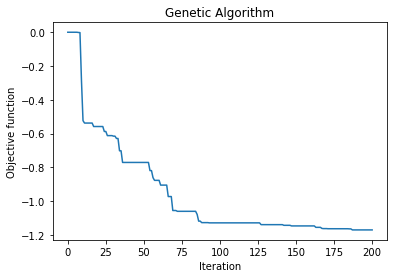

In [4]:
# Defining the objective function
def objective_function(fingerprint):
    # The contraints are implemented in the objective function
    # H1+O1+O2+C4+C2+C3 = 1
    # H1-2*C4-C3+O1 = 0
    # C3 = H1-2*C4+O1
    # C2 = 1 - H1 - O1 - O2 - C4 - C3
    fingerprint_1 = np.zeros((6))
    C_3 = fingerprint[0]-2*fingerprint[2]+fingerprint[1]
    C_2 = 1 - np.sum(fingerprint) - C_3
    fingerprint_1[0:3] = fingerprint[0:3]
    fingerprint_1[4] = C_2
    fingerprint_1[5] = C_3
    prediction = float(kr.predict(fingerprint_1.reshape(1, -1)).ravel()) 
    return prediction

algorithm_param = {'max_num_iteration': None,\
                   'population_size':200,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,1]]*4)

model=ga(function=objective_function,dimension=4,variable_type='real',variable_boundaries=varbound)

model.run()
